In [70]:
# https://docs.google.com/document/d/1eioUEP7i1V89BIXY8u6L3qkvIZchk63ukC6tHJMiSrw/edit#
# Resources Document Link

In [27]:
import Pkg;
Pkg.add("Distributions");
Pkg.add("Plots");
using Random;
using Distributions;
using Statistics;
using Plots: plot,histogram;

   Resolving package versions...
  No Changes to `C:\Users\Devansh\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Devansh\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Devansh\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Devansh\.julia\environments\v1.7\Manifest.toml`


# PROBLEM 1

### Prove that the given algorithm generates a Bern  $\Bigg( \frac{c_y p_y}{c_x p_x + c_y p_y} \Bigg)$ event.  Also, find the probability distribution of the number of iterations it takes to give an output.

$draw~C_1 \sim Bern~(\frac{c_y}{c_x+c_y})$ \
$if~C_1=1 ~then$ \
$~~~~    draw~C_2 \sim Bern~ (p_y)$ \
$~~~~if~C_2=1 ~then$ \
$~~~~~~~~        output ~1$ \
$~~~~if~C_2=0 ~then$ \
$~~~~~~~~        go ~to~ step~ 1$ \
$if~C_1=0 ~then$ \
$~~~~    draw ~C_2 \sim Bern~ (p_x)$ \
$~~~~    if~C_2=1 ~then$ \
$~~~~~~~~        output ~0$ \
$~~~~    if~C_2=0 ~then$ \
$~~~~~~~~        go ~to ~step~ 1$



### THEORETICAL SOLUTION

#### Notation Setup
Let $C_1$ be a random variable of the form $Bern\bigg(\frac{c_y}{c_x+c_y}\bigg)$ and $C_2$ be a random variable distributed as $Bern(p_y)$ for $C_1 = 1$ and distributed as $Bern(p_x)$ for $C_1 = 0$. Let $X$ be a random variable denoting the output of the algorithm above.

#### Problem Observations
1) - The algorithm has only 2 possible outputs which are 0 and 1 and also there must be some non-zero probability associated with both the possible values. This shows that X is a RV with a distribution like $Bern(x_{success})$. \
\
2) - Let us consider all the cases for which $X = 1$.\
**For Only One Iteration** $ P(X ~= ~1~,n~ =~ 1)~ = ~P(C_1 ~=~ 1~ and~ C_2~ = ~1) ~= \frac{c_yp_y}{c_x+c_y}~= K~(let) $ \
**For Two Iterations** $ P(X~ =~ 1~,n~ =~ 2) ~= ~\{P(C_1 ~=~ 1 ~and~ C_2~ =~ 0) ~+ ~P(C_1~ =~ 0~ and~ C_2~ =~ 0)\}K = \frac{c_x(1-p_x)+c_y(1-p_y)}{c_x+c_y}K ~=mK~(let) $
. \
. \
. \
**For n Iterations** $ P(X~ =~ 1~,n)~ = \Bigg(\frac{c_x(1-p_x)+c_y(1-p_y)}{c_x+c_y}\Bigg)^{n-1} K~= {m^{n-1}}K $
\
\
3) - Adding the probabilities over all results for values of n = 1 to positive infinity and using Geometric Progression sum we get - \
$ P(X~ =~ 1)~ = \frac{c_yp_y}{c_x+c_y} \sum_{n = 1}^{\infty}{\Bigg(\frac{c_x(1-p_x)+c_y(1-p_y)}{c_x+c_y}\Bigg)^{n-1}} $ \
$ P(X~ =~ 1)~ = \frac{c_y~p_y}{c_x~p_x + c_y~p_y}$ \
As the only possible values for $X$ is either 0 or 1 and we have found the probability of $X = 1$ thus we can conclude that the algorithm above generates a $X \sim Bern~\Bigg(\frac{c_yp_y}{c_xp_x+c_yp_y}\Bigg)$ Random Variable.
\
\
\
4) - The algorithm might take from 1 to infinitely many iterations to reach to a conclusive value of $X$ because there is no concrete define on when will the loop end. So it depends on the values sampled for $C_1$ and $C_2$. Let us consider $Y$ to denote the number of iterations required to get a value from the algorithm. \
\
5) - We can easily see that $Y$ is a Discrete Random Variable supported on all the Natural Numbers. Now we need to get the probability mass function which can be done easily and we get -\
$ P(X~ =~ n)~ = \frac{c_xp_x+c_yp_y}{c_x+c_y} {\Bigg(1-\frac{c_xp_x+c_yp_y}{c_x+c_y}\Bigg)^{n-1}} $ for $n~ \in~ \{1,2,3 ... \}$\
We can easily identify the value p = $\Bigg(\frac{c_xp_x+c_yp_y}{c_x+c_y}\Bigg)$ such that 0 < p < 1 and thus the above p.m.f is similar to a **Geometric(p) Distribution**. \
\
6) - However a standard *Geometric(p) RV* is defined from the value 0 and has a p.m.f lagging the above by 1 value. So formally we can state the following conclusion - \
$Y \sim Z+1$ where $Z \sim Geometric(p) $ with $p = \Bigg(\frac{c_xp_x+c_yp_y}{c_x+c_y}\Bigg)$ \
\
$EY = EZ+1 = \frac{1}{p}$ and $VarY = VarZ = \frac{1-p}{p^2}$

### VERIFICATION BY SIMULATION

In [3]:
# Bernoulli Random Variable Sampled through simple Discrete Inverse Transform method. Will be used for the simulation later.

function Bernoulli(p::Float64)
    u = rand();
    if u<p
        return 1;
    else
        return 0;
    end
end


Bernoulli (generic function with 1 method)

In [4]:
# The below function generates the RV X following the algorithm given in the question.

function generate1(c_x::Float64,c_y::Float64,p_x::Float64,p_y::Float64)
    c = c_y/(c_x+c_y);
    while true
        c_1 = Bernoulli(c);
        if c_1 == 1
            c_2 = Bernoulli(p_y);
            if c_2 == 1
                return 1;
            else 
                continue;
            end
        else
            c_2 = Bernoulli(p_x);
            if c_2 == 1
                return 0;
            else
                continue;
            end
        end
    end
end


# The below function counts and returns the number of iterations required to complete the generate1() execution.

function generate2(c_x::Float64,c_y::Float64,p_x::Float64,p_y::Float64)
    c = c_y/(c_x+c_y);
    ctr = 0
    while true
        c_1 = Bernoulli(c);
        if c_1 == 1
            c_2 = Bernoulli(p_y);
            if c_2 == 1
                return ctr+1;
            else 
                ctr = ctr+1;
                continue;
            end
        else
            c_2 = Bernoulli(p_x);
            if c_2 == 1
                return ctr+1;
            else
                ctr = ctr+1;
                continue;
            end
        end
    end
end


# Simulator Functions for simulating the respective variables

function simulate1(c_x::Float64,c_y::Float64,p_x::Float64,p_y::Float64,length::Integer)
    arr = [];
    ctr = 0;
    while ctr<length
        c = generate1(c_x,c_y,p_x,p_y);
        push!(arr,c);
        ctr = ctr+1;
    end
    return arr;
end


function simulate2(c_x::Float64,c_y::Float64,p_x::Float64,p_y::Float64,length::Integer)
    arr = [];
    ctr = 0;
    while ctr<length
        c = generate2(c_x,c_y,p_x,p_y);
        push!(arr,c);
        ctr = ctr+1;
    end
    return arr;
end


simulate2 (generic function with 1 method)

In [5]:
# Input for the parameters required for the algorithm implementation.

c_x = readline();
c_y = readline();
p_x = readline();  # 0 < p_x < 1
p_y = readline();  # 0 < p_y < 1
c_x = parse(Float64,c_x);
c_y = parse(Float64,c_y);
p_x = parse(Float64,p_x);
p_y = parse(Float64,p_y);

Random.seed!(123);

stdin> 4
stdin> 5
stdin> 0.6
stdin> 0.4


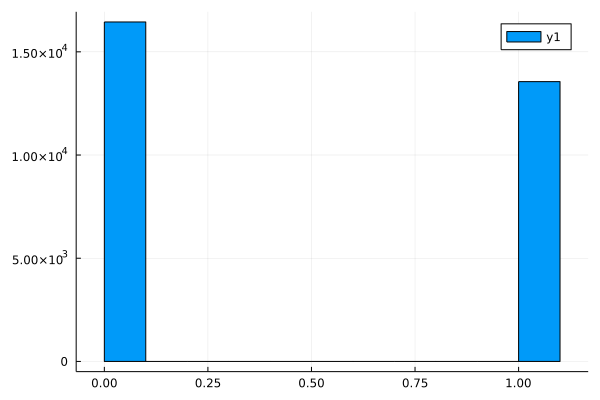

In [6]:
display(plot(histogram(simulate1(c_x,c_y,p_x,p_y,30000))))

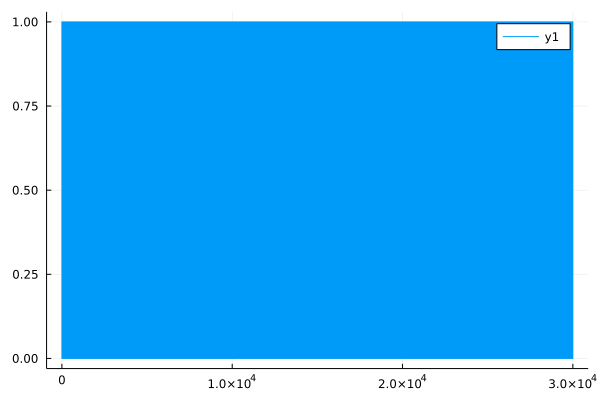

In [7]:
display(plot(simulate1(c_x,c_y,p_x,p_y,30000)))

In [8]:
mean(simulate1(c_x,c_y,p_x,p_y,30000)) # The mean of Bernoulli RV is p

0.45866666666666667

In [9]:
var(simulate1(c_x,c_y,p_x,p_y,30000)) # The variance of Bernoulli RV is p*(1-p)

0.2478211395935401

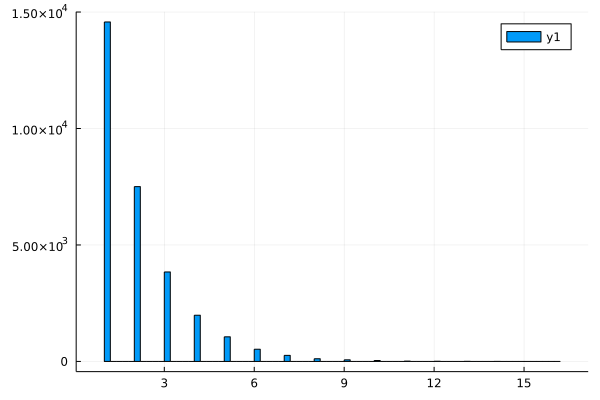

In [10]:
display(plot(histogram(simulate2(c_x,c_y,p_x,p_y,30000))))

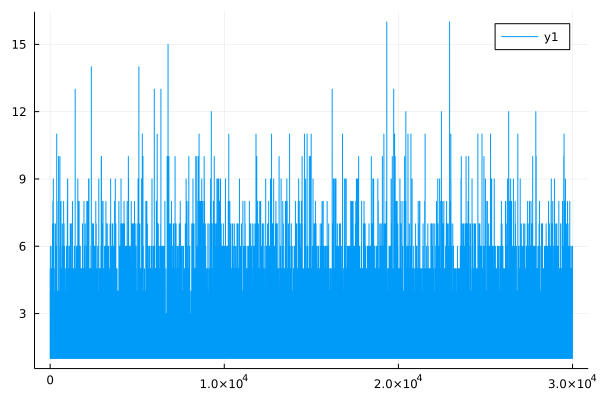

In [11]:
display(plot(simulate2(c_x,c_y,p_x,p_y,30000)))

In [12]:
mean(simulate2(c_x,c_y,p_x,p_y,30000)) # Mean of a Geometric(p) RV here is 1/p 

2.051266666666667

In [13]:
var(simulate2(c_x,c_y,p_x,p_y,30000)) # Variance of the Geometric(p) RV here is (1-p)/p^2

2.1128612020400688

# PROBLEM 2

### Sample uniformly from a p-dimensional sphere (a circle is p=2). Consider a p-vector x = (x1, x2, ... , xp) and let  || . ||  denote the Euclidean norm. The pdf of this distribution is:
$f(x) = \frac{\Gamma(\frac{p}{2}+1)}{\pi^{\frac{p}{2}}} I\{||x|| < 1\}$
### Use a uniform p-dimensional hypercube to sample uniformly from this sphere. Implement this for p = 2, 3, 4, 5, and 6.  What happens as p increases?

### ALGORITHM METHODOLOGY

The algorithm mainly deals with using a Accept Reject Proposal where we would use a p-dimensional hypercube as a proposal distribution and would sample accordingly for a p-dimensional sphere.
In 2 dimensions the problem could be visualised as taking random points in a square and using accept reject technique for sampling points in a circle of unit radius.

**In the codes below first a simpler case of p = 2, 3, 4 and 5 is made and then it is sampled for a general p-dimensinal vector**

### SAMPLING SIMULATIONS

In [14]:
# The below generate functions are for generating random samples in p-dimensional spheres for p = 2
# For sampling the inbuilt function is used for Uniform Random Variables in (0,1)

function generate3()
    arr = []
    while true
        x = 2*rand() - 1;
        y = 2*rand() - 1;
        if x^2 + y^2 < 1
            push!(arr,x);
            push!(arr,y);
            return arr;
        else
            continue
        end
    end
end

function simulate3(length::Integer)
    arr1 = []
    arr2 = []
    ctr = 0
    while ctr < length
        (x,y) = generate3();
        push!(arr1,x);
        push!(arr2,y);
        ctr = ctr+1;
    end
    return (arr1,arr2);
end

simulate3 (generic function with 1 method)

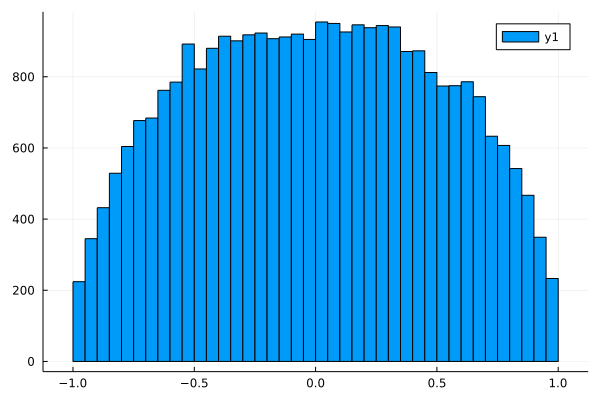

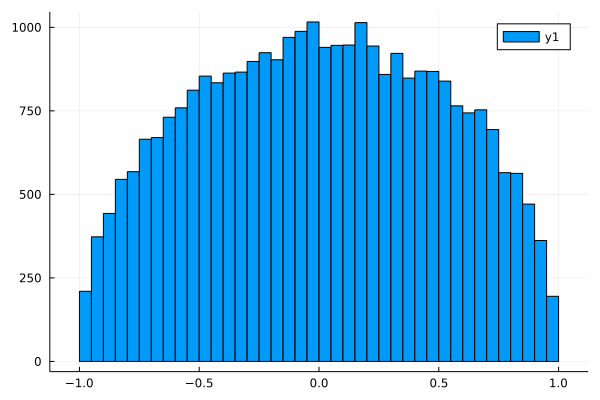

In [15]:
Random.seed!(123);

# A Sample implementation of a large size of points which are randomly chosen from a 2 dimensional unit circle.
# For large values of length the distribution of x and y should practically follow a quadrant of a circle histogram.

(arr1,arr2) = simulate3(30000);
display(plot(histogram(arr1)));
display(plot(histogram(arr2)));

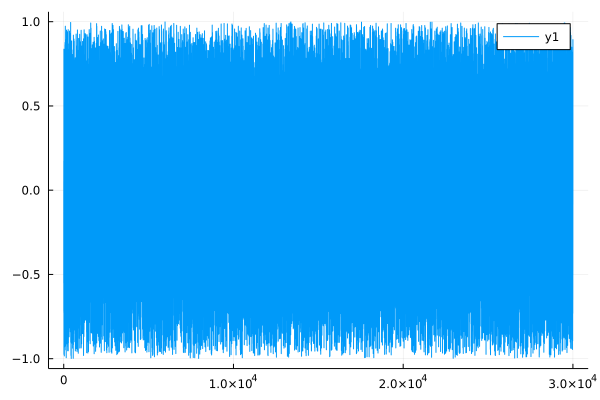

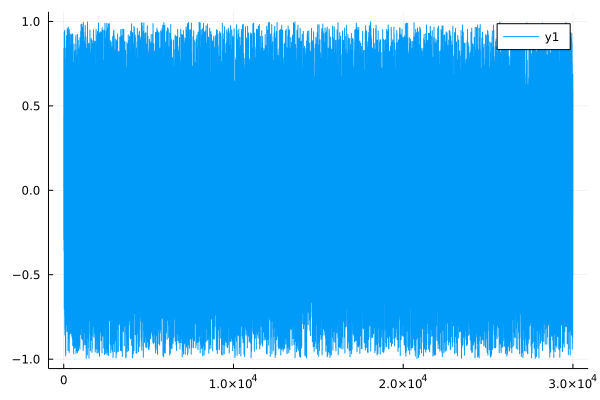

In [16]:
display(plot(arr1));
display(plot(arr2));

In [17]:
# As both the coordinates are symmetric the mean would be same and is theorectically equal to 0

print(mean(arr1));
print("\n");
print(mean(arr2));

0.0008129811854218351
0.005186215852420988

In [18]:
# As both the coordinates are symmetric the variance would be same and is theorectically equal to (1/4)

print(var(arr1));
print("\n");
print(var(arr2));

0.2516429743193409
0.24986493228063228

In [19]:
# The below generate functions are for generating random samples in p-dimensional spheres for p = 3
# For sampling the inbuilt function is used for Uniform Random Variables in (0,1)

function generate4()
    arr = []
    while true
        x = 2*rand() - 1;
        y = 2*rand() - 1;
        z = 2*rand() - 1;
        if x^2 + y^2 + z^2 < 1
            push!(arr,x);
            push!(arr,y);
            push!(arr,z);
            return arr;
        else
            continue
        end
    end
end

function simulate4(length::Integer)
    arr1 = []
    arr2 = []
    arr3 = []
    ctr = 0
    while ctr < length
        (x,y,z) = generate4();
        push!(arr1,x);
        push!(arr2,y);
        push!(arr3,z);
        ctr = ctr+1;
    end
    return (arr1,arr2,arr3);
end

simulate4 (generic function with 1 method)

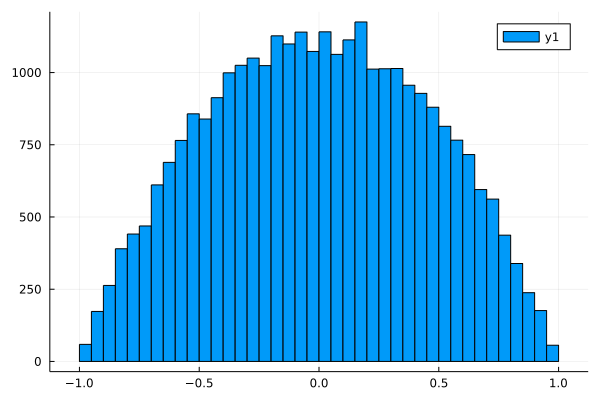

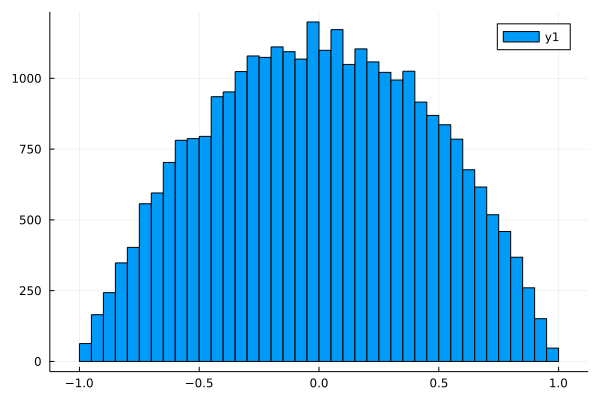

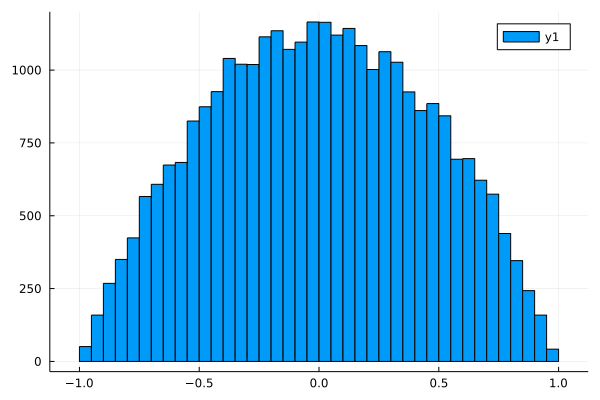

In [20]:
Random.seed!(123);

# A Sample implementation of a large size of points which are randomly chosen from a 3 dimensional unit sphere.
# For large values of length the distribution of x, y and z should practically follow a steaper quadrant of a circle 
# on the histogram.

(arr1,arr2,arr3) = simulate4(30000);
display(plot(histogram(arr1)));
display(plot(histogram(arr2)));
display(plot(histogram(arr3)));

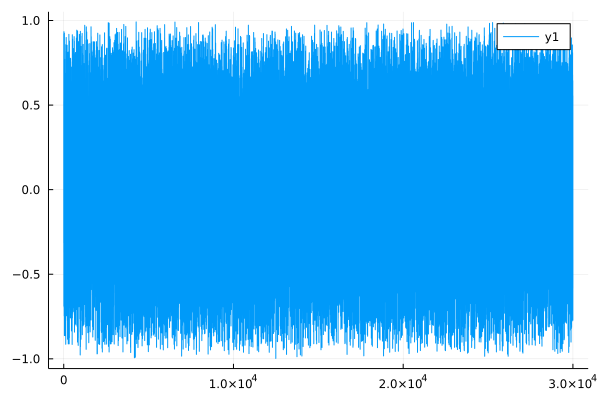

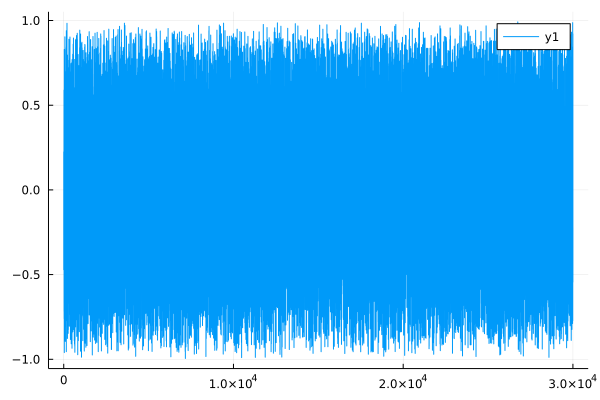

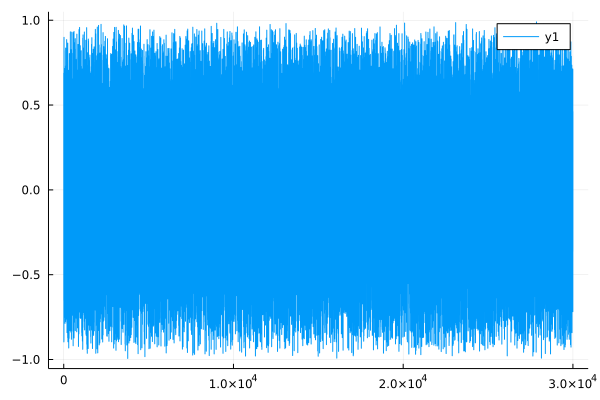

In [21]:
display(plot(arr1));
display(plot(arr2));
display(plot(arr3));

In [22]:
# All the three coordinates are similarly distributed in the first octant of a 3D coordinate plane and are uniformly drawn
# from a sphere so have the same mean and variance. The theoretical values for the mean is 0 and the variance is (1/5).

print(mean(arr1));
print("\n");
print(mean(arr2));
print("\n");
print(mean(arr3));
print("\n");
print(var(arr1));
print("\n");
print(var(arr2));
print("\n");
print(var(arr3));

-0.0005295037979407423
0.0022383953538708838
-0.0016322683336000717
0.20005061938112761
0.19889745076543927
0.19794810888253114

In [23]:
# The below generate functions are for generating random samples in p-dimensional hypersphere
# For sampling the inbuilt function is used for Uniform Random Variables in (0,1)

function generate5(p::Int32)
    while true
        arr = [];
        sq_sum = 0;
        for i in range(1,p)
            x = 2*rand() - 1;
            sq_sum = sq_sum + x^2;
            push!(arr,x);
        end
        if sq_sum < 1
            return arr;
        else
            continue
        end
    end
end

function simulate5(p::Int32,length::Integer)
    arr = [];
    for i in range(1,p)
        c = [];
        push!(arr,c);
    end
    ctr = 0;
    while ctr < length
        X = generate5(p);
        for i in range(1,p)
            push!(arr[i],X[i]);
        end
        ctr = ctr+1;
    end
    return arr;
end

simulate5 (generic function with 1 method)

In [24]:
# Take user inputs for the number of dimensions to be talked of

p = readline();
p = parse(Int32,p);

stdin> 4


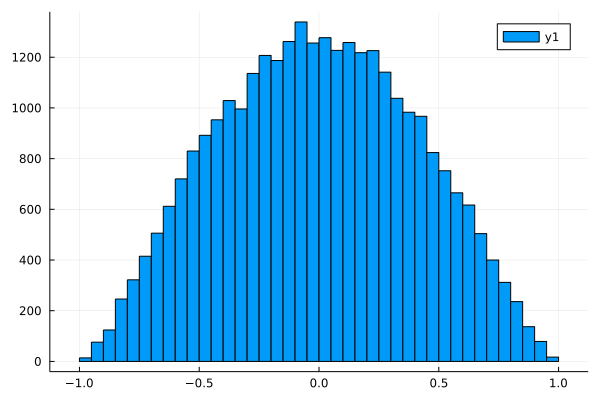

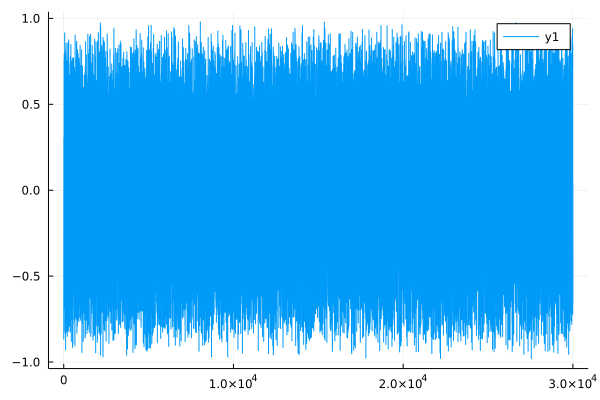

In [25]:
Random.seed!(123);
arr = simulate5(p,30000);

display(plot(histogram(arr[1])));
display(plot(arr[1]));

In [26]:
print(mean(arr[1]));
print("\n");
print(var(arr[1]));

-0.0036202317379250425
0.1661151685416919

# PROBLEM 3

### Using accept-reject and a standard normal proposal, obtain samples from a truncated standard normal distribution with pdf:
$f(x) = \frac{1}{\Phi(a)~-~\Phi(-a)} \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}} I\{-a < x < a\}$
### where $\Phi(·)$ is the CDF of a standard normal distribution. Run for a=4 and a=1.  What are the differences between the two settings?


### THEORETICAL INSIGHTS

1) - For the accept reject method we will take the truncated standard Normal as the target distribution $F$ and the standard normal distribution as the proposal distribution $G$. So the distribution functions are - \
$f(x) = \frac{1}{\Phi(a)~-~\Phi(-a)} \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}} I\{-a < x < a\}$ \
\
$g(x) = \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}}$

2) - Defining the value c as the maximum value of the ratio of $f(x)$ and $g(x)$ then $c$ is -\
$c = \frac{1}{\Phi(a)~-~\Phi(-a)}$ \
\
3) - As the distribution of the number of iterations required for the accept reject method to generate a sample is   $Geometric(\frac{1}{c})$   so it is better to have as small value of $c$ as possible. So **as the support of the truncated target distribution $f(x)$ increases the accept reject method gives a better sampling result**.

In [62]:
# The below function generates a sample for the truncated standard normal distribution between two symmetric points which
# are at 'a' distance from the origin. Also the number 'a' would be given as a parameter to the function.

function generate6(a::Float64)
    ctr = 0
    while true
        d = Normal();
        n = rand(d);
        if n < a && n > -a
            return (n,ctr + 1)
        else
            ctr = ctr + 1
            continue
        end
    end
end

function simulate6(a::Float64,length::Integer)
    arr1 = [];
    arr2 = [];
    ctr = 0;
    while ctr < length
        num = generate6(a);
        push!(arr1,num[1]);
        push!(arr2,num[2]);
        ctr = ctr + 1;
    end
    return (arr1,arr2);
end

simulate6 (generic function with 1 method)

In [63]:
# Take appropriate inputs and show the correct sampled outputs

a1 = readline();
a1 = parse(Float64,a1);

stdin> 1


In [64]:
arr1 = simulate6(a1,30000);
print(mean(arr1[1]));  # Should be zero theoretically.
print('\n');
print(var(arr1[1]));

0.0014812400875525435
0.29409768505431344

In [65]:
a2 = readline();
a2 = parse(Float64,a2);

stdin> 4


In [66]:
arr2 = simulate6(a2,30000);
print(mean(arr2[1]));  # Should be zero theoretically.
print('\n');
print(var(arr2[1]));

-0.007479522061824389
1.0023157346119744

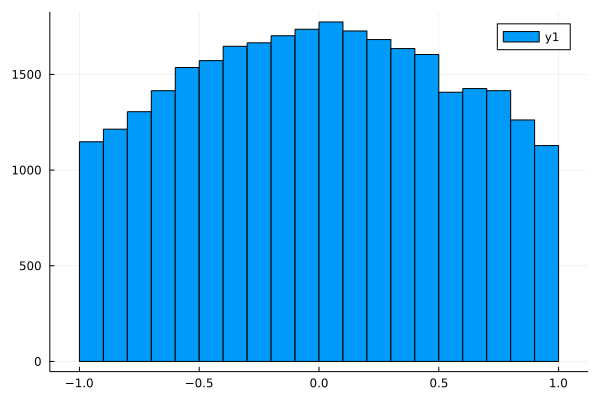

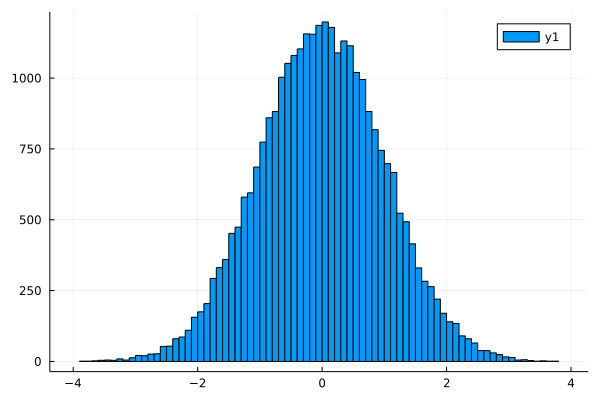

In [67]:
display(plot(histogram(arr1[1])));
display(plot(histogram(arr2[1])));

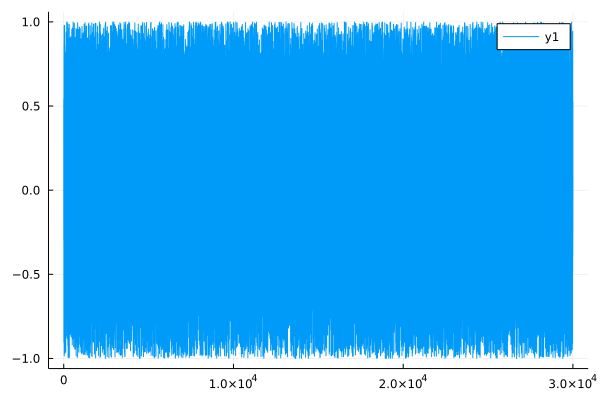

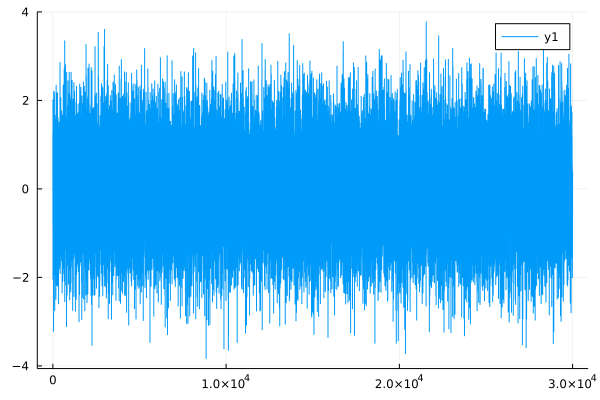

In [68]:
display(plot(arr1[1]));
display(plot(arr2[1]));

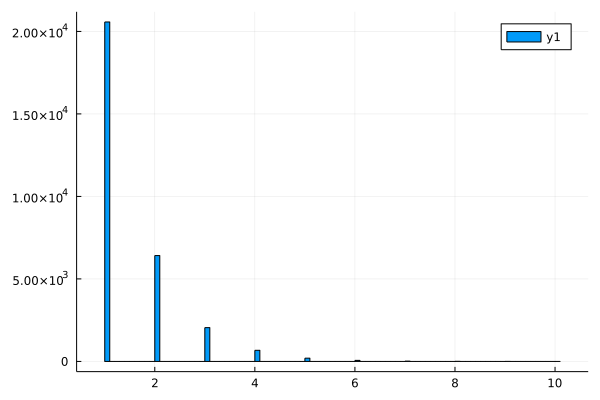

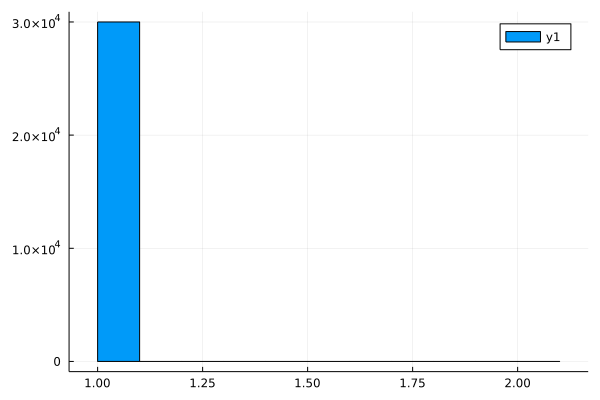

In [69]:
display(plot(histogram(arr1[2])));
display(plot(histogram(arr2[2])));